# Undergraduate Theoretical Statistics

### Applied Statistics
### Sunwoo Kim

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import warnings
warnings.simplefilter("ignore")

import matplotlib
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic') # For Windows
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

## Section 4.3.1. Linearly separable case

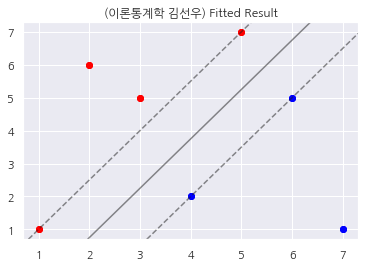

In [2]:
data = np.array([[1, 1], 
                [2, 6], 
                [3, 5], 
                [4, 2], 
                [5, 7], 
                [6, 5], 
                [7, 1]])
y = np.array([1,1,1,-1,1,-1,-1])

plt.scatter(data[[0, 1, 2, 4], 0], data[[0, 1, 2, 4], 1], color = "red")
plt.scatter(data[[3, 5, 6], 0], data[[3, 5, 6], 1], color = "blue")
plt.title("(이론통계학 김선우) Ideal Case")

plt.scatter(data[[0, 1, 2, 4], 0], data[[0, 1, 2, 4], 1], color = "red")
plt.scatter(data[[3, 5, 6], 0], data[[3, 5, 6], 1], color = "blue")

clf = LinearSVC(C=500, loss="hinge", random_state=42).fit(data, y)
    # obtain the support vectors through the decision function
decision_function = clf.decision_function(data)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = data[support_vector_indices]
plt.title("(이론통계학 김선우) Fitted Result")

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[ -1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

## Section 4.3.2.  Linearly not separable case

In [3]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Text(0.5, 1.0, '(이론통계학 김선우) C = 10')

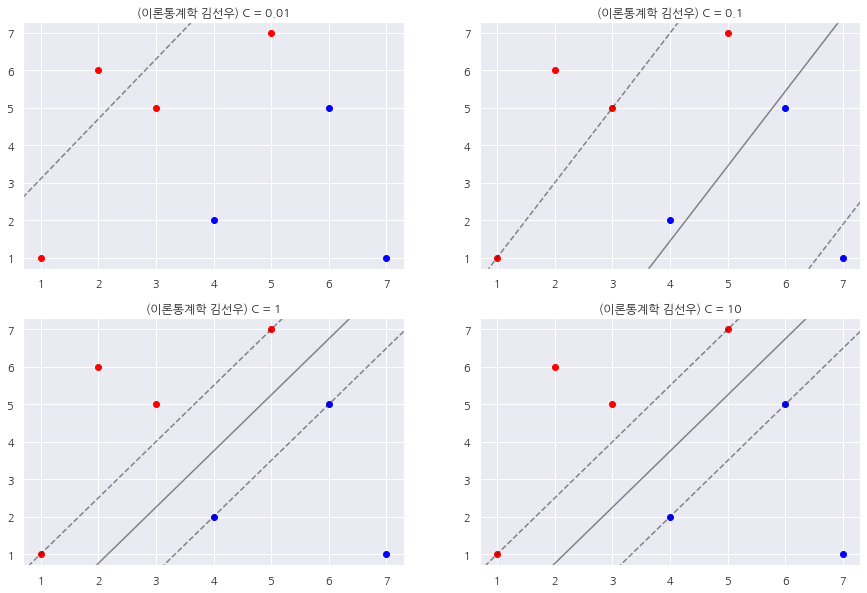

In [4]:
plt.figure(figsize = (15,10))
model = SVC(kernel='linear', C=0.01).fit(data, y)
plt.subplot(221)
plt.scatter(data[np.where(y == 1)[0],0], 
            data[np.where(y == 1)[0],1], color = "red")

plt.scatter(data[np.where(y == -1)[0],0], 
            data[np.where(y == -1)[0],1], color = "blue")
plot_svc_decision_function(model)
plt.title("(이론통계학 김선우) C = 0.01")

model = SVC(kernel='linear', C=0.1).fit(data, y)
plt.subplot(222)
plt.scatter(data[np.where(y == 1)[0],0], 
            data[np.where(y == 1)[0],1], color = "red")

plt.scatter(data[np.where(y == -1)[0],0], 
            data[np.where(y == -1)[0],1], color = "blue")
plot_svc_decision_function(model)
plt.title("(이론통계학 김선우) C = 0.1")

model = SVC(kernel='linear', C=1).fit(data, y)
plt.subplot(223)
plt.scatter(data[np.where(y == 1)[0],0], 
            data[np.where(y == 1)[0],1], color = "red")

plt.scatter(data[np.where(y == -1)[0],0], 
            data[np.where(y == -1)[0],1], color = "blue")
plot_svc_decision_function(model)
plt.title("(이론통계학 김선우) C = 1")

model = SVC(kernel='linear', C=10).fit(data, y)
plt.subplot(224)
plt.scatter(data[np.where(y == 1)[0],0], 
            data[np.where(y == 1)[0],1], color = "red")

plt.scatter(data[np.where(y == -1)[0],0], 
            data[np.where(y == -1)[0],1], color = "blue")
plot_svc_decision_function(model)
plt.title("(이론통계학 김선우) C = 10")

## Section 4.3.3. Linearly not separable case / circular data

Text(0.5, 1.0, '(이론통계학 김선우) 분류가 불가능한 수준')

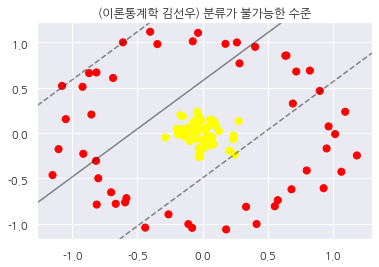

In [5]:
from sklearn.datasets.samples_generator import make_circles
np.random.seed(971120)
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear', C = 100000).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)
plt.title("(이론통계학 김선우) 분류가 불가능한 수준")

## Section 5. Hinge & Log loss

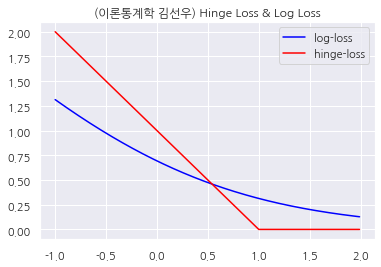

In [6]:
ys = []
y2 = []
for i1 in np.arange(-1, 1,  0.01) : 
    ys.append(np.log(np.exp(-i1) + 1))
for i2 in np.arange(1,2, 0.01) : 
    ys.append(np.log(np.exp(-i2) + 1))
for s1 in np.arange(-1, 1,  0.01) : 
    y2.append(1-s1)
for s2 in np.arange(1,2, 0.01) : 
    y2.append(0)
    
plt.plot(np.arange(-1, 2,  0.01), ys, color = "blue", label = "log-loss")
plt.plot(np.arange(-1, 2,  0.01), y2, color = "red", label = "hinge-loss")
plt.title("(이론통계학 김선우) Hinge Loss & Log Loss")
plt.legend()

## Section 6.3. Kernel-trick method

Text(0.5, 1.0, '(이론통계학 김선우) RBF를 통해 경계면을 형성')

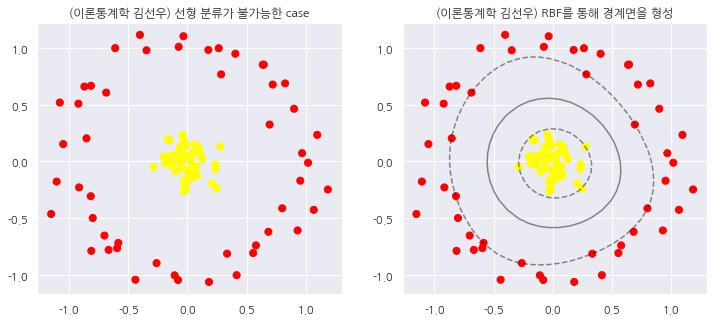

In [7]:
from sklearn.datasets.samples_generator import make_circles
np.random.seed(971120)
X, y = make_circles(100, factor=.1, noise=.1)

plt.figure(figsize=(12,5))
clf = SVC(kernel='rbf', C=1E6).fit(X, y)
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.title("(이론통계학 김선우) 선형 분류가 불가능한 case")

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)
plt.title("(이론통계학 김선우) RBF를 통해 경계면을 형성")

Text(0.5, 1.0, '(이론통계학 김선우) RBF를 통해 경계면을 형성')

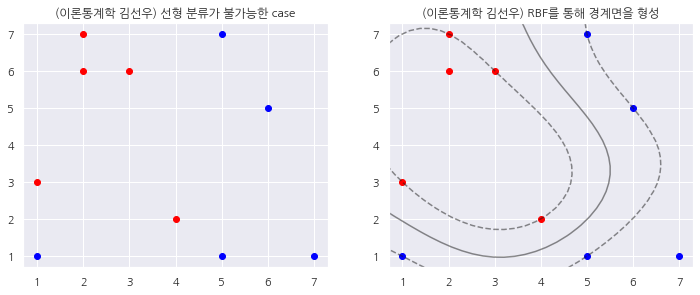

In [8]:
data = np.array([[1, 1], 
                [1, 3],
                [2, 6],
                [2, 7],
                [3, 6],
                [5, 1], 
                [4, 2], 
                [5, 7], 
                [6, 5], 
                [7, 1]])
y = np.array([-1, 1, 1, 1, 1, -1, 1, -1, -1, -1])

plt.figure(figsize=(12,4.5))
plt.subplot(121)
plt.scatter(data[np.where(y == 1)[0],0], 
            data[np.where(y == 1)[0],1], color = "red")

plt.scatter(data[np.where(y == -1)[0],0], 
            data[np.where(y == -1)[0],1], color = "blue")
plt.title("(이론통계학 김선우) 선형 분류가 불가능한 case")

plt.subplot(122)
model = SVC(kernel='rbf', C=1E6).fit(data, y)
plt.scatter(data[np.where(y == 1)[0],0], 
            data[np.where(y == 1)[0],1], color = "red")

plt.scatter(data[np.where(y == -1)[0],0], 
            data[np.where(y == -1)[0],1], color = "blue")
plot_svc_decision_function(model)
plt.title("(이론통계학 김선우) RBF를 통해 경계면을 형성")